In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire
import viz
np.random.seed(4)

iris = acquire.get_iris_data()

### Clustering with the Iris Dataset

In [2]:
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


#### Choose features other than the ones used in the lesson.

In [3]:
X = iris[['sepal_width','petal_length']]

In [11]:
# fit the clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# get predictions
kmeans.predict(X)
iris['cluster'] = kmeans.predict(X)

# create dataframe with center clusters and columns
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
iris.groupby('cluster')['sepal_width', 'petal_length'].mean()

,sepal_width,petal_length
cluster,,
0,3.032558,5.672093
1,3.428000,1.462000
2,2.750877,4.328070


Text(0.5, 1.0, 'Visualizing Cluster Centers')

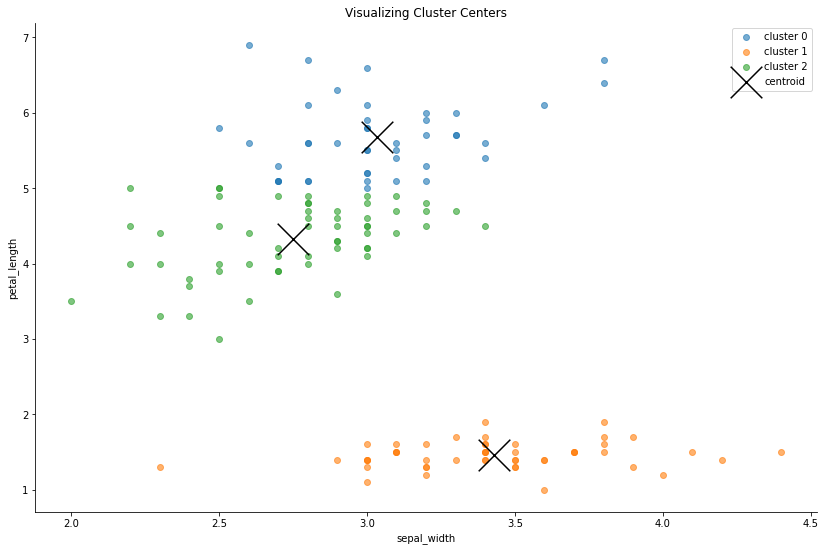

In [13]:
# plot custer centers on data
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_width',
                       c='black', marker='x', s=1000, ax=plt.gca(),
                       label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')
